Построим графики зависимости времени работы, ускорения и эффективности от числа потоков. Для этого запустим программу несколько раз при фиксированных значениях размера массива и размера чанка, но при разном числе потоков. Выберем размер массива достаточно большим, например, $n=10000000$, а размер чанка положим $m = 80000$. Затем считаем из файлов все необходимые данные.

In [1]:
import matplotlib.pyplot as plt

pthreads_stats = open("stats.txt", "r")
qSort_time_file = open("qSort_time.txt", "r")
omp_stats = open("omp_stats.txt")
P_values = [1, 2, 4, 8, 16]
T_values = []
S_values = []
E_values = []
qSort_time = []
Merge_omp = []
for i in range(0, 5):
    line = pthreads_stats.readline()
    line_stats = line.split(' ')
    time = line_stats[0].split('s')
    T_values.append(float(time[0])) #Merge sort pthreads work time
    
    line = omp_stats.readline()
    line_stats = line.split(' ')
    time = line_stats[0].split('s')
    Merge_omp.append(float(time[0])) #Merge sort omp work time
    
    
    S_values.append(T_values[0] / T_values[i])
    E_values.append(S_values[i] / P_values[i])
    qline = qSort_time_file.readline()
    qSort_time.append(float(qline))

Построим график зависимости $T(P)$ для реализации на $pthreads$. На этом же графике отобразим зависимость $T(P)$ для реализации на $OpenMP$ и время работы встроенной в $stdlib$ функции $qsort$.

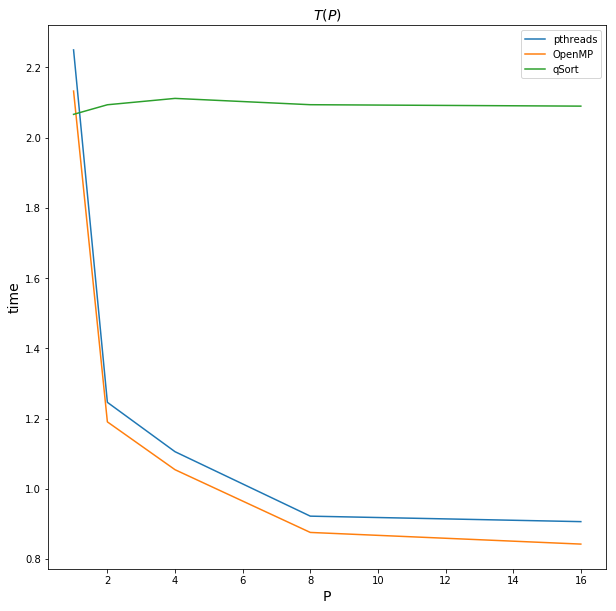

In [2]:
plt.figure(figsize=(10, 10))
plt.plot(P_values, T_values, label = "pthreads")
plt.plot(P_values, Merge_omp, label = "OpenMP")
plt.plot(P_values, qSort_time, label = "qSort")
plt.title("$T(P)$", fontsize = 14)
plt.xlabel("P", fontsize = 14)
plt.ylabel("time", fontsize = 14)
plt.legend()
plt.show()

Как видно из графика, время работы двух реализаций сортировки слиянием сравнимо между собой. На числе потоков $>6$ обе реализации работают быстрее(более, чем в 2 раза), чем встроенная функция $qsort$.

Далее построим графики зависимости $S(P)$ и $E(P)$.

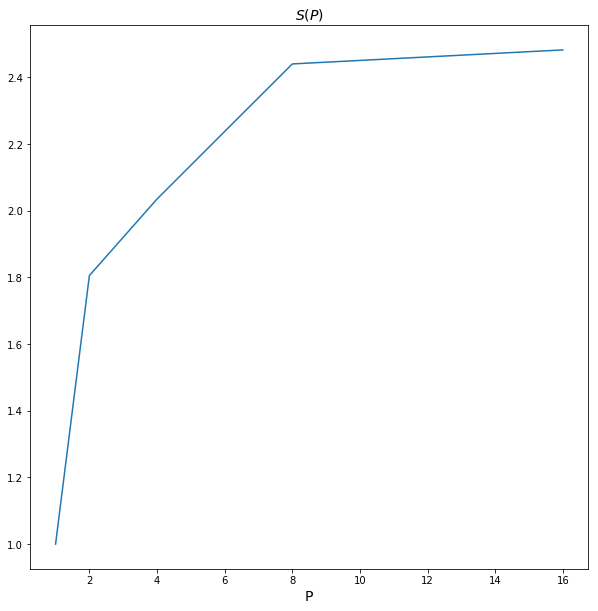

In [3]:
plt.figure(figsize = (10, 10))
plt.plot(P_values, S_values)
plt.title('$S(P)$', fontsize = 14)
plt.xlabel('P', fontsize = 14)
plt.show()

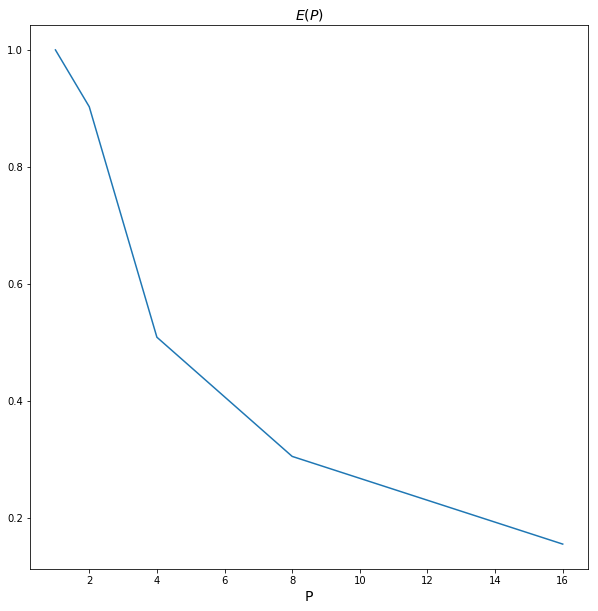

In [4]:
plt.figure(figsize = (10, 10))
plt.plot(P_values, E_values)
plt.title('$E(P)$', fontsize = 14)
plt.xlabel('P', fontsize = 14)
plt.show()